In [1]:
import numpy as np
import scipy
from automata import *
import matplotlib.pyplot as plt

All code here has been modified from a *Conway's Game of Life* example on github: https://gist.github.com/jiffyclub/3778422

# Eun Ju Jong
# Cellular Automata
# CIS-397
# Dr. Hallenbeck

## Cellular Automata Iteration Steps
The function listed after the &mdash; is the function in the list below that performs that step.

1. Create the grid &mdash; *XXX_grid()*
2. Run the following in a loop &mdash; *evolve()*
  - Create a blank "buffer" grid.
  - Execute rules to update the grid into the buffer &mdash; *XXX_rules()*
  - Copy the buffer into the board to replace its data.
  - Display the grid &mdash; *show_grid()*
3. (Optionally) summarize the grid state.

I've completed a *eolve* and *show_grid* for you. It's your job to implement a function which defines grids and rules for a cellular automata. I've given you starting points to go from for each problem.

## 0. Voting Example

In [2]:
def vote_grid(N):
    """
    Creates an NxN array of integers representing a grid of voters.
    Each cell can either contain 0 (blue) or 1 (red)
    
    Parameters
    ----------
    N : int
        The length of one side of the board
    """   
    # Generate a board of random 0s and 1s
    # Return board to user
    board  = scipy.random.random_integers(0, 1, size=[N,N])

    return board
    
def vote_rule(self, neighbors):
    """
    Defines the rules for the cellular automata for "majority vote."
    
    Parameters
    ----------
    self : int
        The value of the cell to update.
    neighbors : array of 8 ints
        The values of the neighboring cells
        
    Returns
    -------
    Updated value of the current cell.
    """
    #self = 0
    #neighbors = [0, 1, 1, 0, 0, 1, 1, 0]
    count = 0
    
    for i in range(len(neighbors)):
        if neighbors[i] == 1:
            count += 1
            
    if count > 4:
        return 1
    if count < 4:
        return 0
    if count == 4:
        return self

    # Count # of Red Neighbors
    # Turn Red  if > half are Red
    # Turn Blue if > half are Blue
    # Stay the same if tied.


In [3]:
vote_colors = ['coral', 'skyblue']       # Define colors for output

grid = vote_grid(50)                # Create a 50x50 grid
show_grid(grid, colors=vote_colors) # Display the grid

# Evolve 20 steps using this rule.
result = evolve(grid, vote_rule, 20, display='always', colors=vote_colors)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 1. Conway's Game of Life
#### Implement the rules and generate a grid for Conway's Game of life:

In [4]:
def life_grid(N, p):
    # TO DO: Create a board full of random numbers from 0 to 1. (use np.random.random)
    # TO DO: Set values in the board to 0 and 1, based on p.
    # TO DO: Return the board to the user
    board  = scipy.random.random(size=[N,N])
    for i in range(N):
        for j in range(N):
            if board[i][j] <= p:
                board[i][j] = 0
            if board[i][j] > p:  
                board[i][j] = 1
                
    return board.astype(int)

In [19]:
# Game of life depends on the total living neighbors
# If the cell is dead, it will become alive if it has exactly 3 living neighbors.
# If the cell is alive, then it will stay alive if it has 2 or 3 living neighbors.
# Otherwise, the cell should be dead.
    
# In any case, return the new value of the cell to the user.

DEAD = 0
ALIVE = 1

def life_rule(self, neighbors):
    count = sum(neighbors == ALIVE)
    count1 = 0
    count2 = 0
    count3 = 0
    if self == DEAD and count == 3:
        self = ALIVE
        return self
    if self == ALIVE and (count == 2 or count == 3):
        return self
    else:
        return DEAD

In [91]:
# This code should populate a 40x40 grid where half of the cells are alive,
# then show animation of the game running for 50 iterations.
life_colors = ['firebrick', 'silver']
grid = life_grid(40, .93)
show_grid(grid, colors=life_colors)
result = evolve(grid, life_rule, 100, display='always', colors=life_colors)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### At approximately what ranges of values of p do you observe the grid to not die off after 100 iterations?
At a range of approximately $0.2 \leq p \leq 0.93$, the grid does not die off after 100 iretations.

## 2. Self-Organizing Spirals
#### Implement a 313 CCA:

In [43]:
# Here, we have 3 possible states: 1, 2, and 3.
# These just correspond to 3 different colors.

def spiral_grid(N):
    # Generate a board which is NxN and contains completely random values 1, 2, and 3.
    # Return the board to the user.
    board  = scipy.random.random_integers(1, 3, size=[N,N])
    return board

def spiral_rule(self, neighbors):
    # The states are cyclic, i.e. 1 -> 2 -> 3 -> 1.
    # Each one can only turn into the NEXT state.
    
    # Additionally, it will only turn into the next state if 3 or more of its
    # neighbors are in the next state.
    
    # Otherwise, it won't change.
    
    # Be sure to return the new (or the same old) state of the cell to the user.
    countOne = sum(neighbors == 1)
    countTwo = sum(neighbors == 2)
    countThree = sum(neighbors == 3)
    
    if self == 1 and countTwo >= 3:
        return 2
    if self == 2 and countThree >= 3:
        return 3
    if self == 3 and countOne >= 3:
        return 1
    else: 
        return self

In [44]:
# This code should populate a 50x50 grid where the cells are all in random states.
# Then show animation of the game running for 100 iterations.
# You should see some spirals.
spiral_colors = ['white', 'silver', 'black', 'yellow']
cells = spiral_grid(50)
show_grid(cells, colors=spiral_colors)
result = evolve(cells, spiral_rule, 50, 'always', spiral_colors)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### Why do you think spirals form? (Watch their origins closely)
It is because cells iterate around the state creating a cycle of tranforming from one state to the next depending on the states of its neighbors. These cycles continuously rotate and generate waves that spread out in a spiral pattern.
#### Why don't spirals form if you change the number of neighbors necessary to 2 or 4?
Cells will not be forming spirals while iterating because the condition disables the transmitting trend of the spiral. When the number of neighbors necessaru to change is 2, cells will convert from one color to another without gradually influencing their neighbors to change color and form spirals. Since there are three stage in total and the probability of neighbors being in each state is approcimately 0.33 when the number of the condition is 3.
<br>
Yet, when the number is 2, the qualification level fro converting color is not as strict as when a higher number is given. Therefore, cells will jump from one color to another without being able to influence their neighbors to gradually transform along with them.
<br>
On the other hand, when the number of the condition is 4, the proportion of each state is less proportional since one state will occupy more proportion than the other two and there will be one state which has the least proportion among the three levels. Therefore, the state with the major proportion of cells will occupy most proportion then the second and third proportional states. Therefore, we can see cells converting to another state by colors being expanded its influence, but it does not have approximately proportional number of cells for each state to eventually form spirals. 

## 3. The Ising Model
#### Implement the Ising Model:

In [1]:
# Here we have two states: -1 or 1, which correspond to the orientation of the spin of an electron.
# If you like, it could also just be two different states of a material.

def ising_grid(N):
    # Generate an NxN board full of -1s and 1s at random.
    # Then, return it to the user.
    board  = scipy.random.randint(2, size=[N,N])
    for i in range(N):
        for j in range(N):
            if board[i][j] == 0:
                board[i][j] = (-1)
    return board

def ising_rule(self, neighbors):
    # Calculate the Hamiltonian for each possible state for this cell.
    # If self = 1,  then the Hamiltonian = - the sum of all neighboring cells
    # If self = -1, then the Hamiltonian = the sum of all neighboring cells
    
    # The probability of being in each state is proportional to
    # Z+ or Z- = e^(-Hamiltonian/T)
    # Where T is a unitless temperature; T = 1.0 corresponds to the "critical temperature" in the
    # material where a phase transition is expected to occur.
    
    # The actual probability of being in a state +1 or -1 is
    #p+ = Z+/(Z+ + Z-)
    #p- = Z-/(Z+ + Z-)
    
    # Finally, return the randomly selected state to the user.

    neighborSum = sum(neighbors)   
    hamiltonian_pos = -neighborSum
    hamiltonian_neg = neighborSum

    z_pos = np.e**(-hamiltonian_pos/T)
    z_neg = np.e**(-hamiltonian_neg/T)
    p_pos = z_pos/(z_pos + z_neg)
    p_neg = 1 - p_pos
    
    random_p = scipy.random.random()
        
    if p_neg >= random_p:
        return -1
    else:
        return 1

In [2]:
# Sets up colors for the Ising Model: cadetblue = -, powderblue = +
ising_colors = ['black', 'cadetblue', 'powderblue']

# Create a random grid of + and -
cells = ising_grid(50)

# Set a temperature T using a global variable.
T = 0.001

# Evolve 25 steps
result = evolve(cells, ising_rule, 25, 'always', ising_colors)

NameError: name 'scipy' is not defined

#### Qualitatively, how does the behavior of the end result change with T?
As T gets larger, the probability of being in a stage becomes smaller since each cells holds greater energy compared to when the temperature is low. Due to the large amount of energy the cell has at a high temperature, it is hard to cause a neighbor automic cell to align. Therefore, considering the ising grid displayed abbove, when T is large, we can see less phase transition between cells and when T is small, we can see more phase trasition between cells.

#### Make a plot as a function of T (this should be logarithmically spaced!) from T = 0.01 to T = 100 of the number of cells in each phase.

In [68]:
# The proplem of not well-spaced cells was from not evenly spaced T value passed into x. 
# Compared to 10e-3 and the earlier values of T, more points are distributed toward the end.
# Therefore, the graph was showing a skewed tendency.
x = np.linspace(0.01, 100, 1000)
posState = []
negState = []
cells = ising_grid(10)

for T in x:
    cells = evolve(cells, ising_rule, 20, 'never', ising_colors)
    pos = sum(sum(cells == 1))
    neg = abs(sum(sum(cells == -1)))
    posState.append(pos)
    negState.append(neg)
    #print(T)
    
plt.semilogx(x, posState, 'ro', label = "1 state")
plt.semilogx(x, negState, 'bo', label = "-1 state")
plt.xlabel("x values")
plt.ylabel("states of cells")

plt.show()

NameError: name 'ising_grid' is not defined

## 4. Disease Model
#### Implement a simple SIR model:

In [276]:
# Here, we'll define 0 = susceptible (healthy), 1 = infected, 2 = removed (dead or cured)
HEALTHY = 0
INFECTED = 1
REMOVED = 2

def disease_grid(N, nSick):
    # Create an NxN board of susceptible people (state = 0).
    board = np.zeros(shape=(N,N), dtype='int')
    
    # Select nSick random cells to be infected (state = 1)
    for i in range(nSick):
        ix = np.random.randint(N)
        iy = np.random.randint(N)
        board[ix, iy] = INFECTED

    return board
        
def disease_rule(self, neighbors):
    # The rules for this model are:
    # If you're removed? Stay removed.
    # If you're infected? You have a probability p of being removed.
    #   Otherwise, stay infected.
    # If you're healthy, you have a probability q of being infected FOR EACH INFECTED NEIGHBOR.
    #   Otherwise, stay healthy. 
    numInfected = sum(neighbors == INFECTED)
    numHealthy = sum(neighbors == HEALTHY)
    probRemoved = scipy.random.random()
    probInfected = scipy.random.random()
    probBeingInfected = 1 - (1 - q)**numInfected
    
    if self == REMOVED:
        return self
    if self == INFECTED: 
        if probRemoved <= p:
            self = REMOVED
            return self
        else: 
            return self
    if self == HEALTHY:
        if probBeingInfected >= probInfected:
            self = INFECTED
            return self
        else:
            return self

In [278]:
# Create a list of colors so susceptible = peru, infected = darkred, and removed = red.
disease_colors = ['peru', 'darkred', 'red']
# Create a 20x20 grid with 40 infected individuals (i.e. 10% infected)
cells = disease_grid(40, 160)

p = 0.1 # Chance that an infected person is removed (cured or dies)
q = 0.4 # Chance that a healthy person is infected by a neighbor

# Evolve and watch the show.
result = evolve(cells, disease_rule, 100, 'always', disease_colors)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### Task 1.
Start with a 40x40 grid in which 1% of the cells start infected, with p = 0.1, q = 0.4.
Slowly change q, and plot, as a function of q/p, the maximum percentage of the population infected.

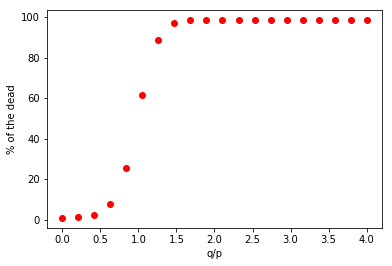

In [251]:
p = 0.1
q_infected = np.linspace(.0, .4, 20)

cells = disease_grid(40, 16)
y = []

for q in q_infected:
    cells = evolve(cells, disease_rule, 20, 'never', disease_colors)
    dead = sum(sum(cells == 2))
    y.append(dead/16)
    
plt.plot(q_infected/p, y, 'ro', label = "% of death")
plt.xlabel("q/p")
plt.ylabel("% of the dead")

plt.show()

## THE ONE BELOW SHOULD BE BONUS because I didn't realize we could only do one of the two tasks....oh well...

#### Task 2.
Modify the disease model so we have zombies instead of infected.
Infected should not become removed unless killed, so q should no longer be probability of removal, but probability per susceptible neighbor of removal. (similar to the definition of p)

In [297]:
HEALTHY = 0
INFECTED = 1
REMOVED = 2

def disease_rule_zombified(self, neighbors):
    numInfected = sum(neighbors == INFECTED)
    numHealthy = sum(neighbors == HEALTHY)
    probRemoved = scipy.random.random()
    probInfected = scipy.random.random()
    probKilled = scipy.random.random()
    probBeingInfected = 1 - (1 - q)**numInfected
    probActuallyKilled = 1 - (1 - p)**numInfected
    
    if self == REMOVED:
        return self
    if self == INFECTED: 
        if probActuallyKilled >= probKilled:
            self = REMOVED
            return self
        else: 
            return self
    if self == HEALTHY:
        if probBeingInfected >= probInfected:
            self = INFECTED
            return self
        else:
            return self

# If you're removed? Stay removed.
# If you're infected? You have a probability p of being removed.
#   Otherwise, stay infected.
# If you're healthy, you have a probability q of being infected FOR EACH INFECTED NEIGHBOR.#   Otherwise, stay healthy.
# p: Chance that an infected person is removed (cured or dies)
# q: Chance that a healthy person is infected by a neighbor

In [298]:
disease_colors = ['peru', 'darkred', 'black']
# Create a 20x20 grid with 40 infected individuals (i.e. 10% infected)
cells = disease_grid(40, 160)

p = 0.1 # Chance that an infected person is removed (cured or dies)
q = 0.4 # Chance that a healthy person is infected by a neighbor

# Evolve and watch the show.
result = evolve(cells, disease_rule_zombified, 100, 'always', disease_colors)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### At what value of q/p will the zombies be able to kill everyone 50% of the time?

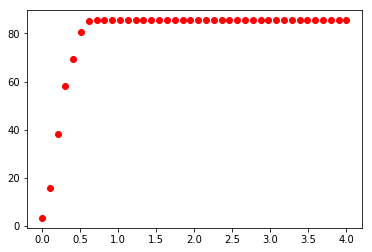

In [299]:
p = 0.1
q_SusceptibleRemove = np.linspace(0.0, 0.4, 40)
cells = disease_grid(20, 40)
y = []

for q in q_SusceptibleRemove:
    cells = evolve(cells, disease_rule_zombified, 30, 'never', disease_colors)
    dead = sum(sum(cells == 2))
    y.append(dead/4)
    
plt.plot(q_SusceptibleRemove/p, y, 'ro', label = "% of killed")

plt.show()

At approximately $\displaystyle\frac{q}{p} = 0.3$, the zombies are able to kill everyone 50% of the time.